In [50]:
"""
 Boston House price Prediction

* The Main task is to clean, Analyze and Identify the best suitable model for the Data.

"""

'\n Boston House price Prediction\n\n* The Main task is to clean, Analyze and Identify the best suitable model for the Data.\n\n'

In [7]:
# Step 1: Importing necessary packages

import pandas as pd # Data manipulation
import numpy as np # numeric operations
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.model_selection import train_test_split # Data splitting
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # Accuracy check for regression models

# Models
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import Lasso # Lasso regression
from sklearn.svm import SVR # SVM Kernal Regression
from sklearn.tree import DecisionTreeRegressor # Descission tree Regression
from sklearn.ensemble import RandomForestRegressor # Random forest Regression

In [8]:
#Step 2: Reading the Data

data = pd.read_csv(r"E:\Analytics projects\regression_analysis\data\Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
# Step 3: Checking the Data

data.info()

# Upon checking we found that there are 0 null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
# Step 4: Data cleaning 

# Removing duplicates:
data = data.drop_duplicates()

# Removing null Values:
data = data.dropna()

# Checking data after cleaning

data.info()

# Upon checking we found that there 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
#Checking data statistics
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# checking co-relation for feature extraction

data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

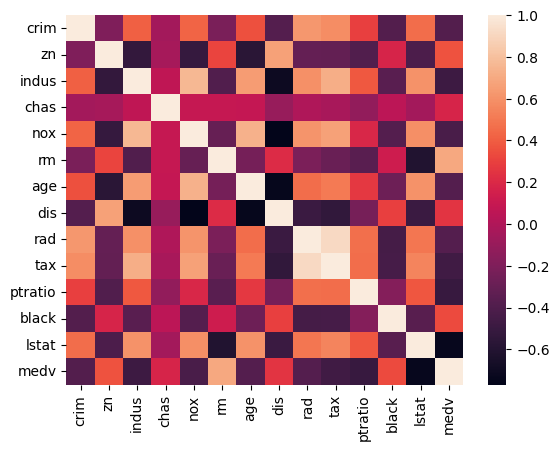

In [13]:
sns.heatmap(data.corr())

In [28]:
# splitting data into train and test

X = data[data.columns[:13]]

X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [30]:
y = data[["medv"]]
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [33]:
# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=15)

print("X Train Data")
print(X_train.head())
print("X Test Data")
print(X_test.head())
print("y Train Data")
print(y_train.head())
print("y test Data")
print(y_test.head())

X Train Data
         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
191   0.06911  45.0   3.44     0  0.437  6.739  30.8  6.4798    5  398   
438  13.67810   0.0  18.10     0  0.740  5.935  87.9  1.8206   24  666   
185   0.06047   0.0   2.46     0  0.488  6.153  68.8  3.2797    3  193   
149   2.73397   0.0  19.58     0  0.871  5.597  94.9  1.5257    5  403   
73    0.19539   0.0  10.81     0  0.413  6.245   6.2  5.2873    4  305   

     ptratio   black  lstat  
191     15.2  389.71   4.69  
438     20.2   68.95  34.02  
185     17.8  387.11  13.15  
149     14.7  351.85  21.45  
73      19.2  377.17   7.54  
X Test Data
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
301  0.03537  34.0   6.09     0  0.433  6.590  40.4  5.4917    7  329   
262  0.52014  20.0   3.97     0  0.647  8.398  91.5  2.2885    5  264   
172  0.13914   0.0   4.05     0  0.510  5.572  88.5  2.5961    5  296   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.505

In [34]:
# Loading all the models
model_1 = LinearRegression()
model_2 = Lasso()
model_3 = SVR()
model_4 = DecisionTreeRegressor()
model_5 = RandomForestRegressor()

In [35]:
# Training all the models

model_1.fit(X_train,y_train) # Linear Regressor
model_2.fit(X_train,y_train) # Lasso Regressor
model_3.fit(X_train,y_train) # SVM Kernal Regressor
model_4.fit(X_train,y_train) # Descission Tree regressor
model_5.fit(X_train,y_train) # Random forest regressor

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [43]:
# Predicting and evaluating Linear Regressor:

y_pred_1 = model_1.predict(X_test) # Prediction

# Accuracy check

MAE = mean_absolute_error(y_pred=y_pred_1,y_true=y_test)
MSE = mean_squared_error(y_pred=y_pred_1,y_true=y_test)
RMSE = np.sqrt(MSE)
r_squared = r2_score(y_pred=y_pred_1,y_true=y_test)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2 Score: {r_squared}")

model_1_accuracy = {"Model": "Linear_Regressor", "MAE": MAE, "MSE": MSE, "RMSE": RMSE, "R2_score": r_squared}

MAE: 3.6860868233802853
MSE: 23.81224546508075
RMSE: 4.8797792434782075
R2 Score: 0.6920749038652134


In [44]:
# Predicting and evaluating Lasso Regressor:

y_pred_2 = model_2.predict(X_test) # Prediction

# Accuracy check

MAE = mean_absolute_error(y_pred=y_pred_2,y_true=y_test)
MSE = mean_squared_error(y_pred=y_pred_2,y_true=y_test)
RMSE = np.sqrt(MSE)
r_squared = r2_score(y_pred=y_pred_2,y_true=y_test)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2 Score: {r_squared}")

model_2_accuracy = {"Model": "Lasso_Regressor", "MAE": MAE, "MSE": MSE, "RMSE": RMSE, "R2_score": r_squared}

MAE: 3.8679501120200825
MSE: 25.952090594764673
RMSE: 5.0943194437299155
R2 Score: 0.6644037622151018


In [45]:
# Predicting and evaluating SVM Regressor:

y_pred_3 = model_3.predict(X_test) # Prediction

# Accuracy check

MAE = mean_absolute_error(y_pred=y_pred_3,y_true=y_test)
MSE = mean_squared_error(y_pred=y_pred_3,y_true=y_test)
RMSE = np.sqrt(MSE)
r_squared = r2_score(y_pred=y_pred_3,y_true=y_test)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2 Score: {r_squared}")

model_3_accuracy = {"Model": "SVM_Regressor", "MAE": MAE, "MSE": MSE, "RMSE": RMSE, "R2_score": r_squared}

MAE: 5.0978549887020845
MSE: 53.518109731358635
RMSE: 7.315607270169623
R2 Score: 0.30793720784766065


In [46]:
# Predicting and evaluating Descission tree Regressor:

y_pred_4 = model_4.predict(X_test) # Prediction

# Accuracy check

MAE = mean_absolute_error(y_pred=y_pred_4,y_true=y_test)
MSE = mean_squared_error(y_pred=y_pred_4,y_true=y_test)
RMSE = np.sqrt(MSE)
r_squared = r2_score(y_pred=y_pred_4,y_true=y_test)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2 Score: {r_squared}")

model_4_accuracy = {"Model": "DescissionTree_Regressor", "MAE": MAE, "MSE": MSE, "RMSE": RMSE, "R2_score": r_squared}

MAE: 3.368627450980392
MSE: 25.74294117647059
RMSE: 5.073750208324272
R2 Score: 0.6671083519535699


In [47]:
 # Predicting and evaluating Random forest Regressor:

y_pred_5 = model_5.predict(X_test) # Prediction

# Accuracy check

MAE = mean_absolute_error(y_pred=y_pred_5,y_true=y_test)
MSE = mean_squared_error(y_pred=y_pred_5,y_true=y_test)
RMSE = np.sqrt(MSE)
r_squared = r2_score(y_pred=y_pred_5,y_true=y_test)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2 Score: {r_squared}")

model_5_accuracy = {"Model": "RandomForest_Regressor", "MAE": MAE, "MSE": MSE, "RMSE": RMSE, "R2_score": r_squared}

MAE: 2.060333333333332
MSE: 11.325224254901961
RMSE: 3.365297052995762
R2 Score: 0.8535492684823591


In [49]:
accuracy = [model_1_accuracy,model_2_accuracy,model_3_accuracy,model_4_accuracy,model_5_accuracy]

accuracy_df = pd.DataFrame(accuracy)

accuracy_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear_Regressor,3.686087,23.812245,4.879779,0.692075
1,Lasso_Regressor,3.867950,25.952091,5.094319,0.664404
2,SVM_Regressor,5.097855,53.518110,7.315607,0.307937
3,DescissionTree_Regressor,3.368627,25.742941,5.073750,0.667108
4,RandomForest_Regressor,2.060333,11.325224,3.365297,0.853549


In [ ]:
#Conclussion:

"""
* From the Accuracy Observations we found that the Random Forest Regressor model is best suited for the data
"""